# **Regression Analysis of the Value Pulse Check Data**

# **1. Loading and Preparing Regression Data**

In [1]:
import pandas as pd
import numpy as np
#from textblob import TextBlob
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from collections import Counter

In [2]:
df2 = pd.read_csv('VPC_Reg_Data.csv')

In [3]:
df_regression = df2[['Connected to HUGO BOSS', 'Please select the country you are based in - Country', 'Which occupational group are you a part of?', 'Are you currently in a leadership position?', 'How long have you been working at HUGO BOSS?', 
                     'How old are you?', 'Functional Group']]

In [4]:
df_regression

,Connected to HUGO BOSS,Please select the country you are based in - Country,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,1,Netherlands,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative
1,2,Germany,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,1,Germany,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,0,Germany,White Collar,No,3-5 years,27 - 34,Logistics & Operations
4,2,Switzerland,No answer,No,1-3 years,27 - 34,Logistics & Operations
...,...,...,...,...,...,...,...
3499,0,NaN,NaN,NaN,NaN,NaN,NaN
3500,1,NaN,NaN,NaN,NaN,NaN,NaN
3501,0,NaN,NaN,NaN,NaN,NaN,NaN
3502,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove rows with NaN values
df_regression = df_regression.dropna()
df_regression_cleaned = df_regression.replace("No answer", pd.NA).dropna()
df_regression_cleaned['How long have you been working at HUGO BOSS?'] = df_regression_cleaned['How long have you been working at HUGO BOSS?'].replace('1-3 years', '1-2 years')

In [6]:
df_regression_cleaned

,Connected to HUGO BOSS,Please select the country you are based in - Country,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,1,Netherlands,White Collar,Yes,1-2 years,43 - 50,Corporate & Administrative
1,2,Germany,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,1,Germany,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,0,Germany,White Collar,No,3-5 years,27 - 34,Logistics & Operations
5,2,Germany,Blue Collar,Yes,> 10 years,35 - 42,IT & Technical Services
...,...,...,...,...,...,...,...
3451,1,United States,White Collar,Yes,> 10 years,51 - 58,Sales & Retail
3454,-2,Canada,Blue Collar,Yes,< 1 year,27 - 34,Sales & Retail
3455,2,Canada,White Collar,Yes,< 1 year,43 - 50,Sales & Retail
3457,1,United States,White Collar,No,1-2 years,27 - 34,Corporate & Administrative


# **2. Regression Analyses**
## **2.1 Linear Regression**

We first perform a linear regression with **Connectedness to Hugo Boss** (ordinal) as a proxy for employee perception and the following independent variables:
- **Age** (ordinal)
- **Tenure** (ordinal)
- **Country** (categorical)
- **Functional Group** (categorical)
- **Occupational Group** (categorical)
- **Leadership Position** (binary)

We proceed with the analysis by encoding categorical variables as dummy variables while encoding Age and Tenure as ordinal variables. To proceed with the OLS regression analysis, the dependent variable "Connectedness to Hugo Boss" is treated as a continous variable. Even though it is ordinal, we can treat it as continous for the purpose of this analysis in alignment with Rhemtulla et al., 2012.

### **2.1.1 Data Preprocessing for Regression**

In [7]:
df_regression_cleaned

,Connected to HUGO BOSS,Please select the country you are based in - Country,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,1,Netherlands,White Collar,Yes,1-2 years,43 - 50,Corporate & Administrative
1,2,Germany,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,1,Germany,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,0,Germany,White Collar,No,3-5 years,27 - 34,Logistics & Operations
5,2,Germany,Blue Collar,Yes,> 10 years,35 - 42,IT & Technical Services
...,...,...,...,...,...,...,...
3451,1,United States,White Collar,Yes,> 10 years,51 - 58,Sales & Retail
3454,-2,Canada,Blue Collar,Yes,< 1 year,27 - 34,Sales & Retail
3455,2,Canada,White Collar,Yes,< 1 year,43 - 50,Sales & Retail
3457,1,United States,White Collar,No,1-2 years,27 - 34,Corporate & Administrative


In [8]:
df_regression_cleaned.dtypes

Connected to HUGO BOSS                                  object
Please select the country you are based in - Country    object
Which occupational group are you a part of?             object
Are you currently in a leadership position?             object
How long have you been working at HUGO BOSS?            object
How old are you?                                        object
Functional Group                                        object
dtype: object

In [9]:
### Data Transformation

# Convert the target variable to numeric
df_regression_cleaned['Connected to HUGO BOSS'] = pd.to_numeric(df_regression_cleaned['Connected to HUGO BOSS'], errors='coerce')

# Ordinal encoding for Age and Tenure
ordinal_encoder = OrdinalEncoder()
df_regression_cleaned['Age'] = ordinal_encoder.fit_transform(df_regression_cleaned[['How old are you?']])
df_regression_cleaned['Tenure'] = ordinal_encoder.fit_transform(df_regression_cleaned[['How long have you been working at HUGO BOSS?']])

# Binary encoding for Leadership
df_regression_cleaned['Leadership'] = df_regression_cleaned['Are you currently in a leadership position?'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables (Country, Functional Group, and Occupational Group)
df_encoded = pd.get_dummies(df_regression_cleaned, columns=[
    'Please select the country you are based in - Country',
    'Which occupational group are you a part of?',
    'Functional Group'
], drop_first=True)

# Remove original columns
df_encoded = df_encoded.drop(columns=[
    'How old are you?', 
    'How long have you been working at HUGO BOSS?', 
    'Are you currently in a leadership position?'
])

# Rename columns
df_encoded.rename(columns={'Connected to HUGO BOSS': 'Connectedness'}, inplace=True)
df_encoded.rename(columns=lambda x: x.replace('Please select the country you are based in - Country_', 'Country_'), inplace=True)



In [10]:
print(df_encoded.dtypes)

Connectedness                                                 int64
Age                                                         float64
Tenure                                                      float64
Leadership                                                    int64
Country_Austria                                                bool
Country_Belgium                                                bool
Country_Brazil                                                 bool
Country_Canada                                                 bool
Country_Denmark                                                bool
Country_Dubai                                                  bool
Country_Finland                                                bool
Country_France                                                 bool
Country_Germany                                                bool
Country_Greater China                                          bool
Country_Greece                                  

### **2.1.2 Visualizing the variables**

#### **Dependent Variable: Connectedness to Hugo Boss**

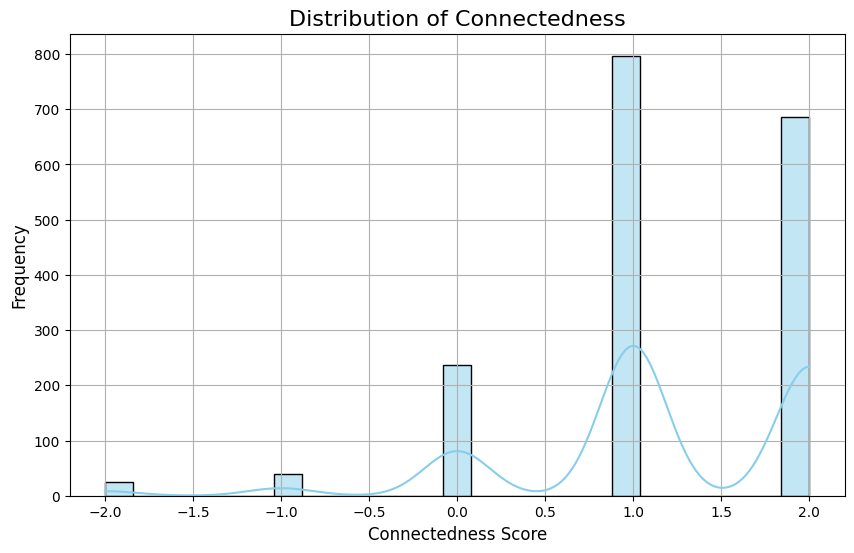

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Connectedness'], kde=True, color='skyblue')
plt.title('Distribution of Connectedness', fontsize=16)
plt.xlabel('Connectedness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25620/2453754691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Connectedness', data=df_encoded, palette="Set2")


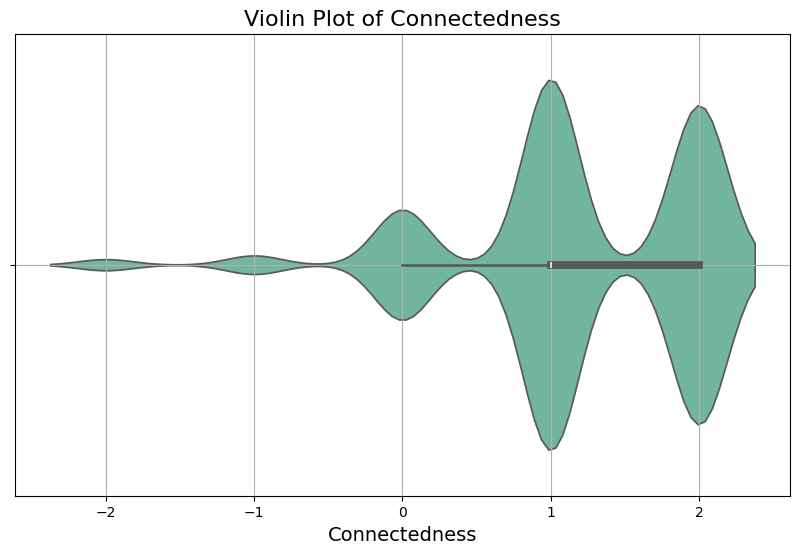

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Connectedness', data=df_encoded, palette="Set2")
plt.title('Violin Plot of Connectedness', fontsize=16)
plt.xlabel('Connectedness', fontsize=14)
plt.grid(True)
plt.show()


### **Independent Variables**
#### **Age**

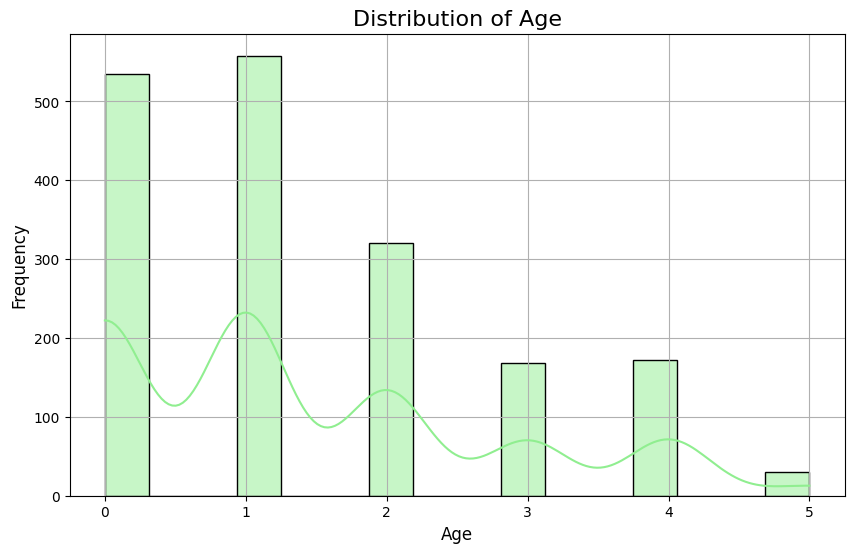

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Age'], kde=True, color='lightgreen')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

#### **Tenure**

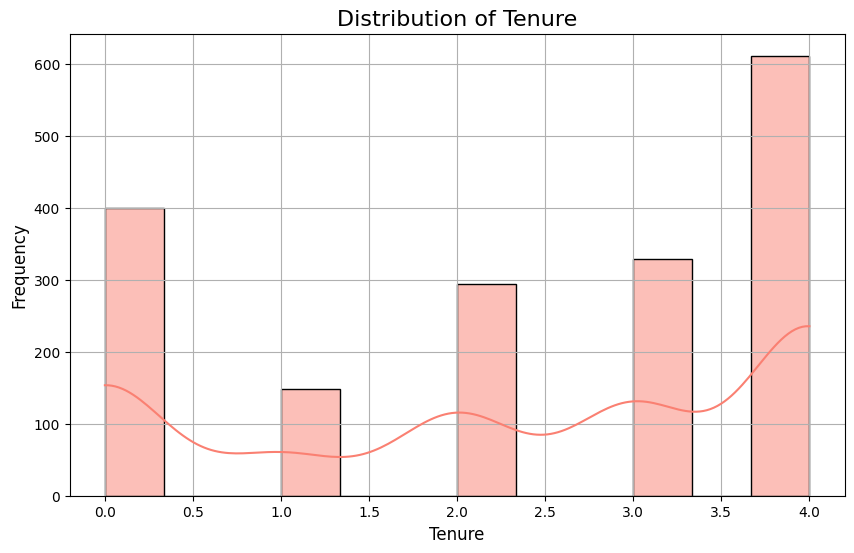

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Tenure'], kde=True, color='salmon')
plt.title('Distribution of Tenure', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

#### **Leadership Position**

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25620/4190058514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Leadership', data=df_encoded, palette='Purples')


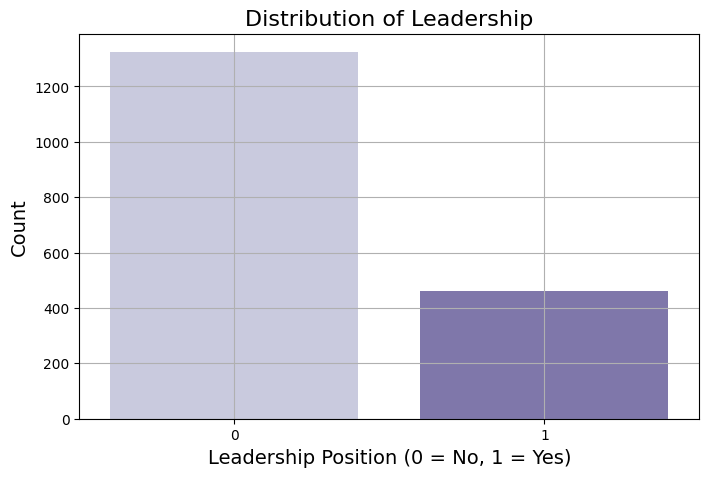

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Leadership', data=df_encoded, palette='Purples')
plt.title('Distribution of Leadership', fontsize=16)
plt.xlabel('Leadership Position (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()


#### **Functional Group**

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25620/3367394659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_regression_cleaned["Functional Group"], palette='Set2')


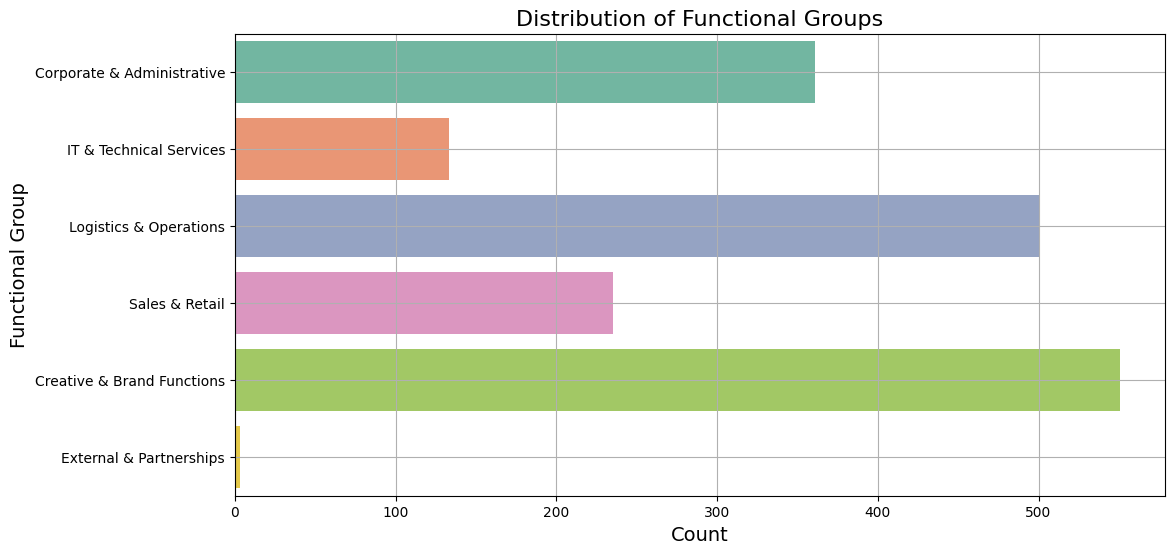

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_regression_cleaned["Functional Group"], palette='Set2')
plt.title('Distribution of Functional Groups', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Functional Group', fontsize=14)
plt.grid(True)
plt.show()


#### **Country**

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25620/4176157783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Please select the country you are based in - Country', data=df_regression_cleaned, palette="Set2")


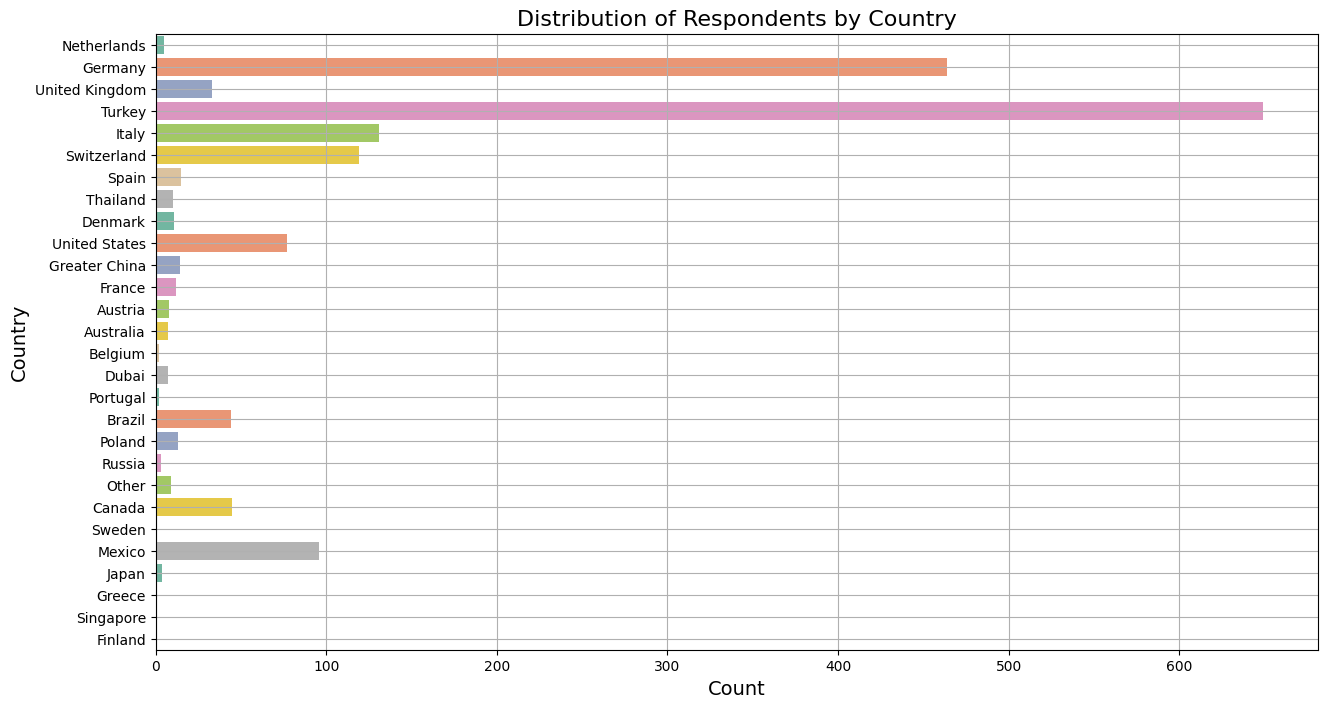

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Please select the country you are based in - Country', data=df_regression_cleaned, palette="Set2")
plt.title('Distribution of Respondents by Country', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True)
plt.show()


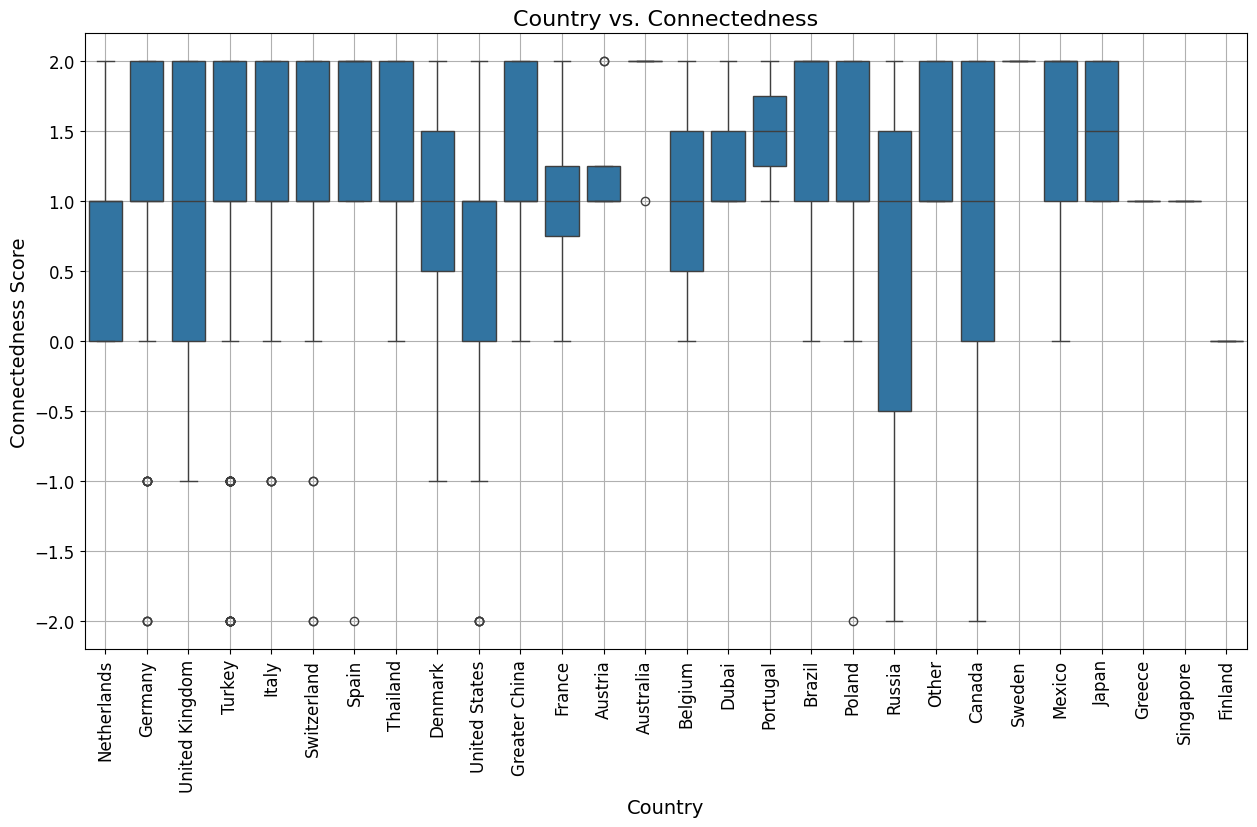

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_regression_cleaned['Please select the country you are based in - Country'], y=df_regression_cleaned['Connected to HUGO BOSS'])
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.title('Country vs. Connectedness', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Connectedness Score', fontsize=14)
plt.grid(True)
plt.show()


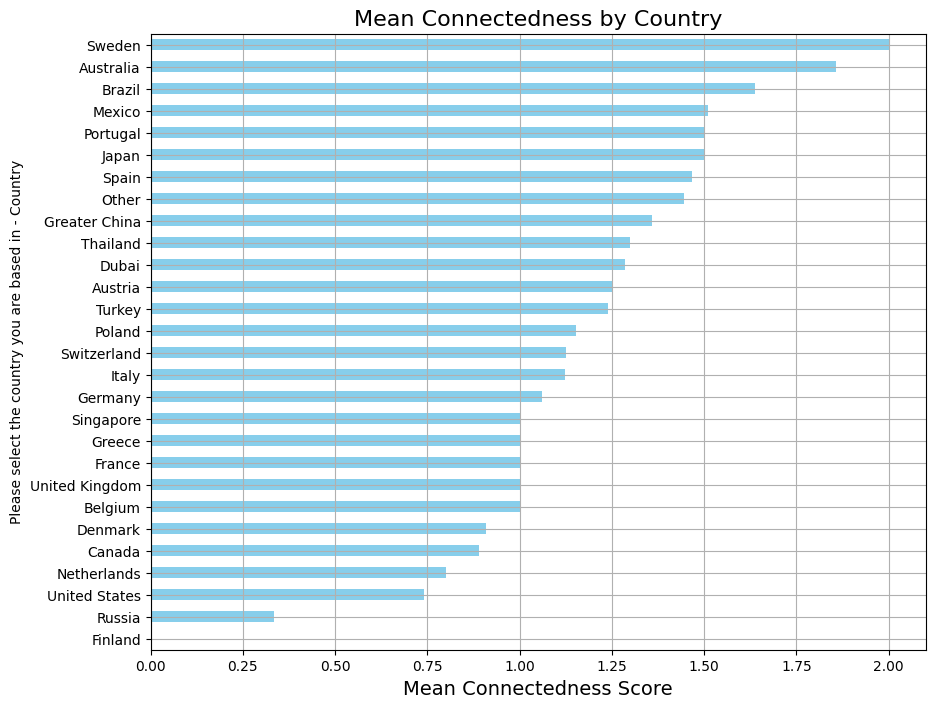

In [19]:
country_mean_satisfaction = df_regression_cleaned.groupby('Please select the country you are based in - Country')['Connected to HUGO BOSS'].mean().sort_values()
plt.figure(figsize=(10, 8))
country_mean_satisfaction.plot(kind='barh', color='skyblue')
plt.title('Mean Connectedness by Country', fontsize=16)
plt.xlabel('Mean Connectedness Score', fontsize=14)
plt.grid(True)
plt.show()

#### **Occupational Group**

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25620/1558830548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Which occupational group are you a part of?', data=df_regression_cleaned, palette='Set3')


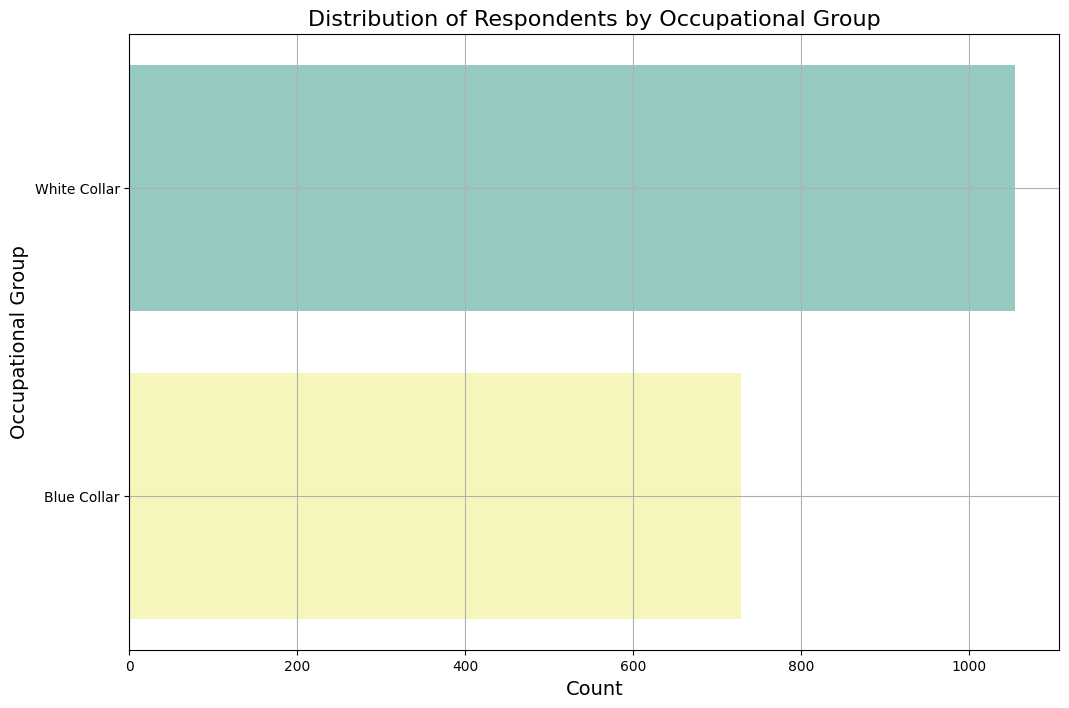

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Which occupational group are you a part of?', data=df_regression_cleaned, palette='Set3')
plt.title('Distribution of Respondents by Occupational Group', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupational Group', fontsize=14)
plt.grid(True)
plt.show()

### **2.1.3 OLS Regression Analysis**

We perform an OLS regression analysis to understand the relationship between the dependent variable "Connectedness to Hugo Boss" and the independent variables. In The results of the regression analysis are as follows:

In [21]:
# Independent Variables
X = df_encoded.drop(columns=['Connectedness'])
X = sm.add_constant(X)

# Dependent variable
y = df_encoded['Connectedness']

# Convert to Numeric
X = X.astype(int)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

# Fit the OLS model
model = sm.OLS(y_cleaned, X_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Connectedness   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.882
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.72e-13
Time:                        18:29:22   Log-Likelihood:                -2145.1
No. Observations:                1784   AIC:                             4364.
Df Residuals:                    1747   BIC:                             4567.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.5285      0.316      4.837      0.000       0.909       2.148
Age                                                          0.0338      0.015      2.278      0.023       0.005       0.063
Tenure                                                       0.0438      0.013      3.353      0.001       0.018       0.069
Leadership                                                   0.2011      0.050      4.032      0.000       0.103       0.299
Country_Austria                                             -0.5705      0.423     -1.350      0.177      -1.399       0.259
Country_Belgium                                             -0.7020      0.653     -1.074      0.283      -1.984       0.580
Country_Brazil                                              -0.0892      0.332     -0.269      0.788      -0.740       0.562
Country_Canada                                              -0.9874      0.332     -2.973      0.003      -1.639      -0.336
Country_Denmark                                             -0.7970      0.395     -2.017      0.044      -1.572      -0.022
Country_Dubai                                               -0.4741      0.436     -1.087      0.277      -1.330       0.382
Country_Finland                                             -1.6400      0.873     -1.878      0.061      -3.353       0.073
Country_France                                              -0.8389      0.388     -2.164      0.031      -1.599      -0.078
Country_Germany                                             -0.6925      0.312     -2.221      0.026      -1.304      -0.081
Country_Greater China                                       -0.4532      0.377     -1.201      0.230      -1.193       0.287
Country_Greece                                              -1.0078      0.871     -1.157      0.247      -2.716       0.701
Country_Italy                                               -0.6486      0.318     -2.041      0.041      -1.272      -0.025
Country_Japan                                               -0.3398      0.510     -0.666      0.506      -1.341       0.661
Country_Mexico                                              -0.1932      0.320     -0.603      0.546      -0.821       0.435
Country_Netherlands                                         -1.0006      0.478     -2.095      0.036      -1.937      -0.064
Country_Other                                               -0.2692      0.412     -0.654      0.513      -1.077       0.538
Country_Poland                                              -0.5893      0.383     -1.537      0.124      -1.341       0.163
Country_Portugal                                            -0.2810      0.654     

#### **Summary of OLS Regression Results**

- **Dependent Variable**: Connectedness (How connected employees feel to HUGO BOSS)
- **R-squared**: 0.074
  - The model explains **7.4%** of the variance in connectedness.
- **Adjusted R-squared**: 0.055
  - Adjusted for the number of predictors in the model, this shows the model's explanatory power slightly decreases.
- **F-statistic**: 3.882 (p = 1.72e-13)
  - The overall model is statistically significant, as at least some of the independent variables significantly influence connectedness.

---

#### **Coefficients:**

- **Intercept (Constant)**:
  - Coefficient: **1.5285**, p < 0.001
  - Baseline expected connectedness score when all other variables are held at 0.
  
- **Age**:
  - Coefficient: **0.0338**, p = 0.023
  - Older employees tend to feel more connected to HUGO BOSS. A one-unit increase in age corresponds to a 0.0338 increase in connectedness.

- **Tenure**:
  - Coefficient: **0.0438**, p = 0.001
  - Employees with longer tenure feel more connected to the company. A one-unit increase in tenure corresponds to a 0.0438 increase in connectedness.

- **Leadership**:
  - Coefficient: **0.2011**, p < 0.001
  - Employees in leadership positions feel more connected to HUGO BOSS by about 0.2011 units compared to those not in leadership roles.

- **Country Effects**:
  - **Country_Canada**: Coefficient: **-0.9874**, p = 0.003
  - **Country_France**: Coefficient: **-0.8389**, p = 0.031
  - **Country_United States**: Coefficient: **-1.0857**, p = 0.001
  - **Country_Russia**: Coefficient: **-1.4119**, p = 0.012
  - **Country_Germany**, **Country_Italy**, **Country_Switzerland**, **Country_Netherlands** also show significantly lower connectedness.
  
- **Occupational Group (White Collar vs Non-White Collar)**:
  - No significant difference in connectedness between White Collar and Non-White Collar employees.

- **Functional Group**:
  - None of the functional groups have a statistically significant effect on connectedness.

---

#### **Diagnostic Statistics**:

- **Durbin-Watson**: **1.917** (close to 2, indicating no autocorrelation in residuals).
- **Jarque-Bera (JB)**: p-value < 0.001
  - Residuals are not normally distributed as p-value is less than .05, which violates OLS assumptions.
- **AIC**: 4364.4 
- **BIC**: 4567.7 
- **Kurtosis**: 4.772, indicates non-normality in the tails of the residual distribution.
- **Skewness**: -1.069, indicates some negative skewness in residuals.


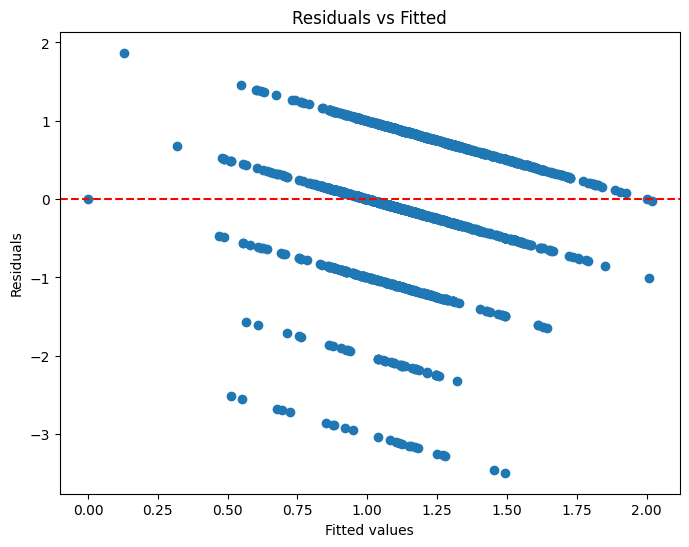

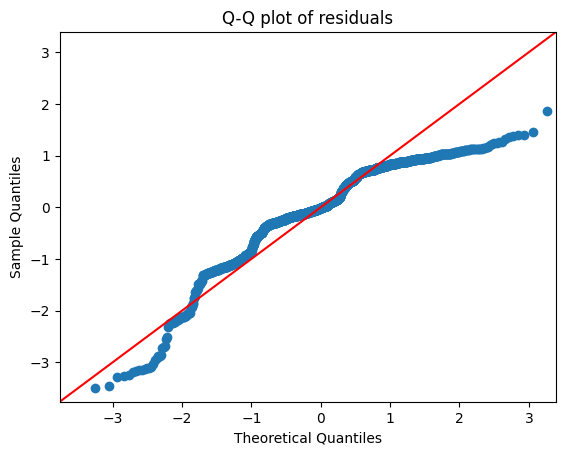

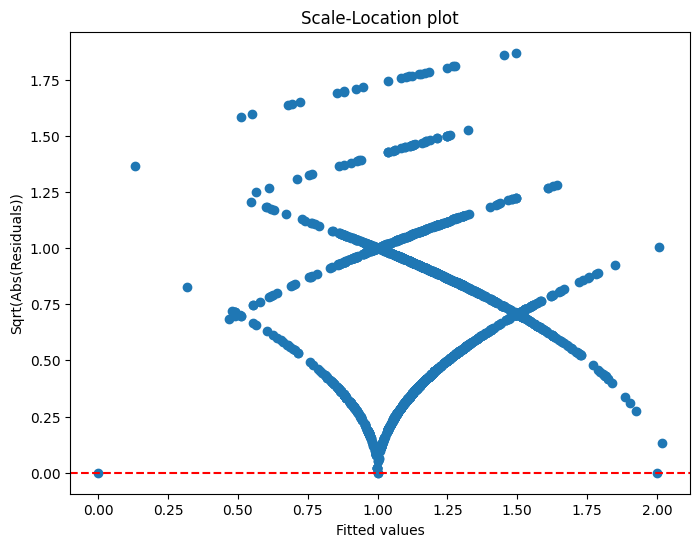

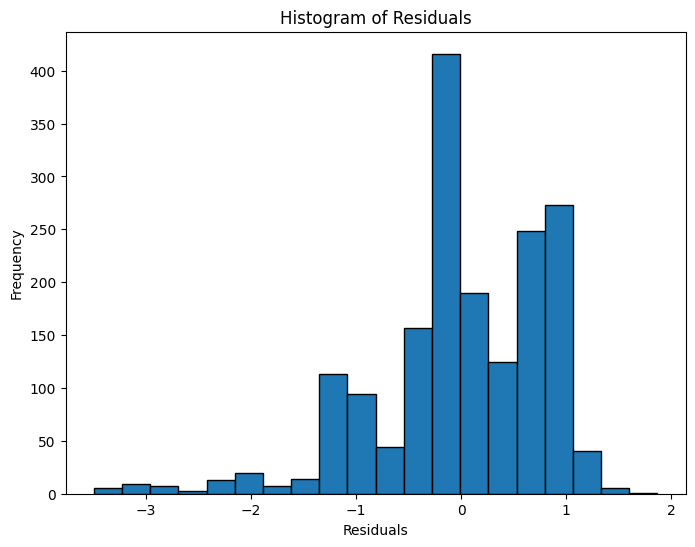

In [22]:
# Extract residuals and fitted values
fitted_values = model.fittedvalues
residuals = model.resid

# Residuals vs Fitted plot (for linearity)
plt.figure(figsize=(8,6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot of residuals')
plt.show()

# Scale-Location plot 
plt.figure(figsize=(8,6))
plt.scatter(fitted_values, np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location plot')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Abs(Residuals))')
plt.show()

# Histogram of residuals 
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


- **Since the residuals are clearly non-normally distributed and there seem to be patterns in the data indicating heteroscedasticity, we pivot from using a linear regression model and proceed with our analysis using an Ordered Logistic Regression Model, which may fit the data better as the target variable is on an ordinal scale.**

### **2.2 Ordered Logistic Regression**
#### **2.2.1 Initial Ordered Logistic Regression Model**

In [23]:
# Remove constant from X_cleaned for ordinal logistic regression
X_cleaned = X_cleaned.drop(columns=['const'], errors='ignore')  # Drop 'const' if it exists

# Convert data types to numerical
X_cleaned = X_cleaned.astype(int)
y_cleaned = pd.to_numeric(y_cleaned, errors='coerce')

# Fit the ordinal logistic regression model
model = OrderedModel(y_cleaned, X_cleaned, distr='logit')
ordinal_results = model.fit(method='bfgs', maxiter=1000)

ordinal_results.summary()

Optimization terminated successfully.
         Current function value: 1.094378
         Iterations: 248
         Function evaluations: 250
         Gradient evaluations: 250


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -1952.4
Model:                   OrderedModel   AIC:                             3985.
Method:            Maximum Likelihood   BIC:                             4204.
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:49                                         
No. Observations:                1784                                         
Df Residuals:                    1744                                         
Df Model:                          36                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Age                                                          0.0533      0.035      1.531      0.126      -0.015       0.121
Tenure                                                       0.0968      0.031      3.164      0.002       0.037       0.157
Leadership                                                   0.5545      0.118      4.679      0.000       0.322       0.787
Country_Austria                                             -2.3419      1.253     -1.869      0.062      -4.798       0.114
Country_Belgium                                             -2.4334      2.017     -1.207      0.228      -6.386       1.519
Country_Brazil                                              -0.7425      1.134     -0.655      0.513      -2.965       1.480
Country_Canada                                              -2.9612      1.129     -2.624      0.009      -5.173      -0.749
Country_Denmark                                             -2.6158      1.229     -2.129      0.033      -5.024      -0.208
Country_Dubai                                               -2.0278      1.271     -1.595      0.111      -4.520       0.464
Country_Finland                                             -4.4309      1.901     -2.330      0.020      -8.158      -0.704
Country_France                                              -2.8433      1.213     -2.344      0.019      -5.221      -0.466
Country_Germany                                             -2.4321      1.092     -2.227      0.026      -4.572      -0.292
Country_Greater China                                       -1.9071      1.194     -1.597      0.110      -4.247       0.433
Country_Greece                                              -3.2937      1.966     -1.676      0.094      -7.146       0.559
Country_Italy                                               -2.3206      1.101     -2.108      0.035      -4.478      -0.163
Country_Japan                                               -1.6051      1.433     -1.120      0.263      -4.413       1.203
Country_Mexico                                              -1.0624      1.108     -0.959      0.338      -3.234       1.109
Country_Netherlands                                         -3.1875      1.354     -2.354      0.019      -5.842      -0.533
Country_Other                                               -1.4600      1.249     -1.169      0.242      -3.908       0.988
Country_Poland                                              -1.8124      1.218     -1.488      0.137      -4.199       0.574
Country_Portugal                                            -1.4100      1.712     -0.823      0.410      -4.766       1.946
Country_Russia                                              -2.9002      1.774     -1.635      0.102      -6.378       0.577
Country_Singapore                    

#### **Model Fit Improvements: Ordered Logistic Regression vs. OLS**

- **Log-Likelihood:**
  - Ordered Logistic: **-1952.4**
  - OLS: **-2145.1**

- **AIC (Akaike Information Criterion):**
  - Ordered Logistic: **3985**
  - OLS: **4364**

- **BIC (Bayesian Information Criterion):**
  - Ordered Logistic: **4204**
  - OLS: **4567**

#### **Conclusion:**
- **The Ordered Logistic Model** provides a better fit compared to OLS regression, as indicated by improvements in log-likelihood, AIC, and BIC. This model better captures the ordinal nature of the dependent variable (Connectedness) and outperforms OLS in balancing model fit and complexity. 

- **We proceed the analysis by refining the model through feature reduction and multicollinearity checks. We exclude non-significant variables and ensure that the model assumptions are met, especially since there is a large number of country dummy variables. Interestingly, functional and occupational groups do not seem to play a role regarding connectedness to HUGO BOSS.**

#### **2.2.2 Model Diagnostic Checks and Feature Reduction**

In [24]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]
vif_data


,feature,VIF
0,Age,2.273285
1,Tenure,3.614720
2,Leadership,1.723174
3,Country_Austria,1.053989
4,Country_Belgium,1.018755
5,Country_Brazil,1.247103
6,Country_Canada,1.360333
7,Country_Denmark,1.052429
8,Country_Dubai,1.032256
9,Country_Finland,1.007114


- **From the output we see no problems with multicollinearity as all VIF values are <10. We proceed by drastically reducing the number of country dummy variables to avoid overfitting and improve model interpretability.**

In [25]:
# Drop statistically insignificant variables based on p-values > 0.05
X_cleaned = X_cleaned.drop(columns=[
    'Age',
    'Country_Belgium', 
    'Country_Mexico',
    'Country_Austria',
    'Country_Brazil', 
    'Country_Other', 
    'Country_Portugal', 
    'Country_Russia', 
    'Country_Singapore', 
    'Country_Spain', 
    'Country_Sweden', 
    'Country_Dubai', 
    'Country_Greater China',
    'Country_Greece',
    'Country_Poland', 
    'Country_Thailand',
    'Country_Japan',
    'Country_Netherlands',
    'Country_United Kingdom',
    'Country_France',
    'Country_Denmark',
    'Which occupational group are you a part of?_White Collar', 
    'Functional Group_IT & Technical Services', 
    'Functional Group_Logistics & Operations', 
    'Functional Group_External & Partnerships',
    'Functional Group_Creative & Brand Functions', 
    'Functional Group_Sales & Retail',
], errors='ignore')

# Re-run ordinal logistic regression with recuced features
model = OrderedModel(y_cleaned, X_cleaned, distr='logit')
ordinal_results = model.fit(method='bfgs', maxiter=1000)

ordinal_results.summary()


Optimization terminated successfully.
         Current function value: 1.108602
         Iterations: 79
         Function evaluations: 80
         Gradient evaluations: 80


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -1977.7
Model:                   OrderedModel   AIC:                             3981.
Method:            Maximum Likelihood   BIC:                             4053.
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:53                                         
No. Observations:                1784                                         
Df Residuals:                    1771                                         
Df Model:                           9                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.0994      0.030      3.341      0.001       0.041       0.158
Leadership                0.4944      0.111      4.473      0.000       0.278       0.711
Country_Canada           -1.3035      0.319     -4.086      0.000      -1.929      -0.678
Country_Finland          -2.9708      1.555     -1.911      0.056      -6.018       0.076
Country_Germany          -0.8332      0.145     -5.756      0.000      -1.117      -0.549
Country_Italy            -0.7284      0.197     -3.706      0.000      -1.114      -0.343
Country_Switzerland      -0.7388      0.207     -3.568      0.000      -1.145      -0.333
Country_Turkey           -0.2069      0.141     -1.469      0.142      -0.483       0.069
Country_United States    -1.5223      0.243     -6.268      0.000      -1.998      -1.046
-2/-1                    -4.5424      0.239    -19.017      0.000      -5.011      -4.074
-1/0                      0.0076      0.163      0.047      0.963      -0.311       0.327
0/1                       0.5445      0.068      8.059      0.000       0.412       0.677
1/2                       0.7720      0.032     24.465      0.000       0.710       0.834
=========================================================================================
"""

#### **Ordered Logistic Regression Summary**

- **Log-Likelihood**: -1977.7
- **AIC**: 3981.0
- **BIC**: 4053.0

---

#### **Coefficients**

- **Tenure**: 
  - **Coefficient**: 0.0994 (p = 0.001)
  - **Odds Ratio** (for interpretability of coefficients): Exp(0.0994) ≈ 1.104
  - Employees with longer tenure are **10.4% more likely** to report a higher level of connectedness for each additional year or unit of tenure.

- **Leadership**: 
  - **Coefficient**: 0.4944 (p = 0.000)
  - **Odds Ratio**: Exp(0.4944) ≈ 1.639
  - Being in a leadership position significantly increases the likelihood of being in a higher connectedness category. Employees in leadership positions are **63.9% more likely** to feel more positively connected compared to non-leadership positions.

- **Country Effects**:
  - **Country_Canada**: 
    - **Coefficient**: -1.3035 (p = 0.000)
    - **Odds Ratio**: Exp(-1.3035) ≈ 0.271
    - Employees from Canada are **72.9% less likely** to report a higher level of connectedness compared to the reference group.

  - **Country_Germany**: 
    - **Coefficient**: -0.8332 (p = 0.000)
    - **Odds Ratio**: Exp(-0.8332) ≈ 0.435
    - Employees from Germany are **56.5% less likely** to report a higher level of connectedness compared to the reference group.

  - **Country_Italy**: 
    - **Coefficient**: -0.7284 (p = 0.000)
    - **Odds Ratio**: Exp(-0.7284) ≈ 0.483
    - Employees from Italy are **51.7% less likely** to report a higher level of connectedness.

  - **Country_Switzerland**: 
    - **Coefficient**: -0.7388 (p = 0.000)
    - **Odds Ratio**: Exp(-0.7388) ≈ 0.478
    - Employees from Switzerland are **52.2% less likely** to report a higher level of connectedness.

  - **Country_United States**: 
    - **Coefficient**: -1.5223 (p = 0.046)
    - **Odds Ratio**: Exp(-1.5223) ≈ 0.218
    - Employees from the United States are **78.2% less likely** to report a higher level of connectedness.

---

#### **Thresholds Interpretation**

The thresholds represent the cut-off points for transitioning between the connectedness levels:

- **-2/-1**: -4.5424
- **-1/0**: -0.1084
- **0/1**: 0.0711
- **1/2**: 0.7720

---

#### **Model Diagnostics and Previous Steps**

- **Model Fit**: The log-likelihood (-1977.7), AIC (3981), and BIC (4053) indicate an appropriate fit.

---

#### **Conclusion**

The ordered logistic model provides a robust framework for understanding how tenure, leadership, and country of operation affect employees' connectedness. Employees in leadership roles or with longer tenure are more likely to report higher connectedness. On the other hand, employees from countries like **Canada**, and the **United States** are significantly less likely to report a positive sense of connectedness.



#### **2.2.3 Proportional Odds Assumption Assumptions Check and Resampling**

- The proportional odds assumption states that the effect of each independent variable on the dependent variable is constant across all levels of the dependent variable. We test this assumption using likelihood ratio tests.

In [26]:
# Function to perform proportional odds testing
def test_proportional_odds(y, X, cut_points, maxiter=1000, method='bfgs'):
    lr_test_results = []
    
    for i in range(len(cut_points) - 1):
        # Convert dependent variable to binary for each cut-point
        y_binary = (y > cut_points[i]).astype(int)
        
        # Fit binary logistic regression model with custom method and iteration count
        logit_model = sm.Logit(y_binary, X)
        try:
            logit_results = logit_model.fit(method=method, maxiter=maxiter, disp=0)
        except Exception as e:
            print(f"Error fitting the model for cut-point {cut_points[i]}: {e}")
            continue
        
        # Perform likelihood ratio test
        lr_test = logit_results.llr_pvalue  
        lr_test_results.append(lr_test)
    
    # Output the p-values of the proportional odds test for each cut-point
    for i, p_value in enumerate(lr_test_results):
        print(f"Test for cut-point {cut_points[i]}: p-value = {p_value}")

X_cleaned = sm.add_constant(X_cleaned) 
cut_points = [-2, -1, 0, 1, 2] 

test_proportional_odds(y_cleaned, X_cleaned, cut_points, maxiter=5000, method='lbfgs')


Test for cut-point -2: p-value = 0.0953217142202563
Test for cut-point -1: p-value = 0.0010693655025354283
Test for cut-point 0: p-value = 3.376528552452245e-08
Test for cut-point 1: p-value = 4.732456576350615e-20


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


- **The output of the proportional odds comparison indicates that the assumption is violated for multiple cutpoints, meaning that the relationship between independent variables and odds of being in a higher category (more connected to HUGO BOSS) of the dependent variable (connectedness to Hugo Boss) is not consistent across all levels. This violation suggests that the ordered logistic regression model may not be the best fit for our data.**

- **We consequently inspect class balance to see whether there is a potential imbalance that may impact the proportional odds assumption, which might also be a factor influencing the invertion of the hessian matrix.**

Class distribution: Counter({1: 797, 2: 686, 0: 237, -1: 40, -2: 24})


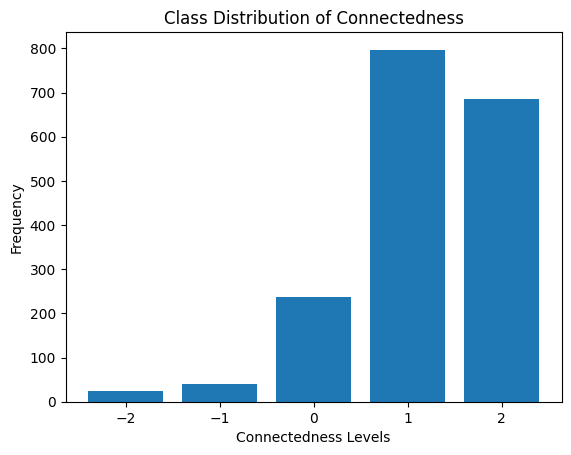

In [27]:
# Check the distribution of the dependent variable Connectedness
class_distribution = Counter(y_cleaned)
print(f"Class distribution: {class_distribution}")

plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Connectedness Levels')
plt.ylabel('Frequency')
plt.title('Class Distribution of Connectedness')
plt.show()


- **As we can see, there is a heavy imbalance in our data with the majority of responses falling in the positive categories. This imbalance may be contributing to the violation of the proportional odds assumption.**

- **We proceed by oversampling the minority classes to balance the data and re-run the ordered logistic regression model.**

In [28]:
# Combine X_cleaned and y_cleaned into a dataframe for resampling
data = pd.concat([X_cleaned, y_cleaned], axis=1)

# Separate data by class
class_2 = data[data['Connectedness'] == 2]
class_1 = data[data['Connectedness'] == 1]
class_0 = data[data['Connectedness'] == 0]
class_minus_1 = data[data['Connectedness'] == -1]
class_minus_2 = data[data['Connectedness'] == -2]

# Oversample the minority classes to match the largest class
max_size = data['Connectedness'].value_counts().max()
class_minus_2_oversampled = resample(class_minus_2, replace=True, n_samples=max_size, random_state=42)
class_minus_1_oversampled = resample(class_minus_1, replace=True, n_samples=max_size, random_state=42)
class_0_oversampled = resample(class_0, replace=True, n_samples=max_size, random_state=42)
data_balanced = pd.concat([class_2, class_1, class_0_oversampled, class_minus_1_oversampled, class_minus_2_oversampled])

# Split data
X_resampled = data_balanced.drop(columns=['Connectedness', 'const'])
y_resampled = data_balanced['Connectedness']

# Re-run ordinal logistic regression
model_resampled = OrderedModel(y_resampled, X_resampled, distr='logit')
ordinal_results_resampled = model_resampled.fit(method='bfgs', maxiter=1000)
ordinal_results_resampled.summary()


Optimization terminated successfully.
         Current function value: 1.561635
         Iterations: 68
         Function evaluations: 70
         Gradient evaluations: 70


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -6049.8
Model:                   OrderedModel   AIC:                         1.213e+04
Method:            Maximum Likelihood   BIC:                         1.221e+04
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:56                                         
No. Observations:                3874                                         
Df Residuals:                    3861                                         
Df Model:                           9                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.1647      0.019      8.823      0.000       0.128       0.201
Leadership                0.2756      0.076      3.647      0.000       0.127       0.424
Country_Canada           -1.5821      0.174     -9.106      0.000      -1.923      -1.242
Country_Finland          -0.6313      0.842     -0.750      0.454      -2.282       1.019
Country_Germany          -0.2782      0.100     -2.771      0.006      -0.475      -0.081
Country_Italy            -0.3374      0.136     -2.490      0.013      -0.603      -0.072
Country_Switzerland      -0.8446      0.138     -6.115      0.000      -1.115      -0.574
Country_Turkey           -0.7078      0.097     -7.272      0.000      -0.899      -0.517
Country_United States    -1.8462      0.136    -13.604      0.000      -2.112      -1.580
-2/-1                    -1.6550      0.096    -17.276      0.000      -1.843      -1.467
-1/0                      0.0666      0.033      2.025      0.043       0.002       0.131
0/1                      -0.1049      0.033     -3.215      0.001      -0.169      -0.041
1/2                       0.1028      0.033      3.119      0.002       0.038       0.167
=========================================================================================
"""

Class distribution: Counter({1: 797, 0: 797, -1: 797, -2: 797, 2: 686})


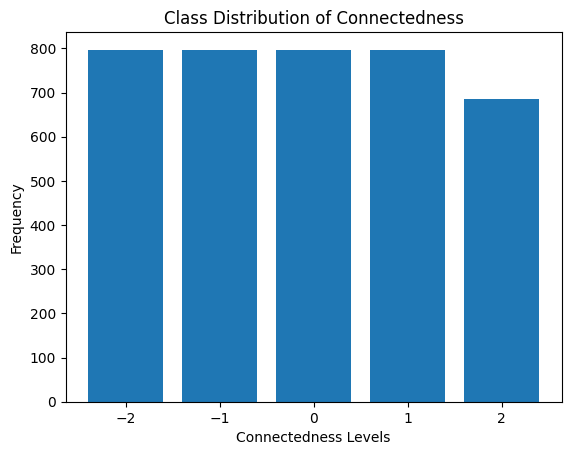

In [29]:
# Check the distribution of the dependent variable Connectedness
class_distribution = Counter(y_resampled)
print(f"Class distribution: {class_distribution}")

plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Connectedness Levels')
plt.ylabel('Frequency')
plt.title('Class Distribution of Connectedness')
plt.show()


- **The performance indicators AIC and BIC have exploded and are a lot larger than the previous model. Furthermore, the log-likelihood has become signficantly more negative, implying that the model fits the data worse than the original ordered logistic regression model. This indicates that the model fit has worsened after oversampling the data.** 

- **Consequently, we will not proceed with the oversampled data and will proceed by undersampling majority classes to balance the classes in our data.**

In [30]:
# Resample data to balance the classes
df_combined = pd.concat([X_cleaned, y_cleaned], axis=1)
class_1 = df_combined[df_combined['Connectedness'] == 1]
class_2 = df_combined[df_combined['Connectedness'] == 2]
class_0 = df_combined[df_combined['Connectedness'] == 0]
class_minus_1 = df_combined[df_combined['Connectedness'] == -1]
class_minus_2 = df_combined[df_combined['Connectedness'] == -2]

minority_size = min(len(class_0), len(class_minus_1), len(class_minus_2))
class_1_downsampled = resample(class_1, 
                               replace=False, 
                               n_samples=minority_size, 
                               random_state=42)

class_2_downsampled = resample(class_2, 
                               replace=False, 
                               n_samples=minority_size, 
                               random_state=42)

df_resampled = pd.concat([class_1_downsampled, class_2_downsampled, class_0, class_minus_1, class_minus_2])

# Split data
X_resampled = df_resampled.drop(columns = ['Connectedness','const'])
y_resampled = df_resampled['Connectedness']

# Re-run the ordinal logistic regression on the resampled dataset
model_resampled = OrderedModel(y_resampled, X_resampled, distr='logit')
ordinal_results_resampled = model_resampled.fit(method='bfgs', maxiter=1000)
ordinal_results_resampled.summary()


Optimization terminated successfully.
         Current function value: 1.039502
         Iterations: 72
         Function evaluations: 73
         Gradient evaluations: 73


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -362.79
Model:                   OrderedModel   AIC:                             751.6
Method:            Maximum Likelihood   BIC:                             801.7
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:56                                         
No. Observations:                 349                                         
Df Residuals:                     336                                         
Df Model:                           9                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.1206      0.075      1.610      0.108      -0.026       0.267
Leadership                0.5278      0.310      1.701      0.089      -0.080       1.136
Country_Canada           -1.4724      0.636     -2.316      0.021      -2.718      -0.226
Country_Finland          -0.1673      2.016     -0.083      0.934      -4.118       3.784
Country_Germany           0.0584      0.395      0.148      0.882      -0.716       0.832
Country_Italy            -0.1257      0.606     -0.207      0.836      -1.314       1.062
Country_Switzerland      -0.3132      0.568     -0.551      0.582      -1.427       0.801
Country_Turkey           -0.6316      0.396     -1.596      0.110      -1.407       0.144
Country_United States    -0.7457      0.541     -1.377      0.168      -1.807       0.315
-2/-1                    -2.6829      0.410     -6.541      0.000      -3.487      -1.879
-1/0                      0.1290      0.156      0.829      0.407      -0.176       0.434
0/1                       1.2458      0.058     21.456      0.000       1.132       1.360
1/2                      -0.2424      0.201     -1.206      0.228      -0.637       0.152
=========================================================================================
"""

Class distribution: Counter({0: 237, -1: 40, 1: 24, 2: 24, -2: 24})


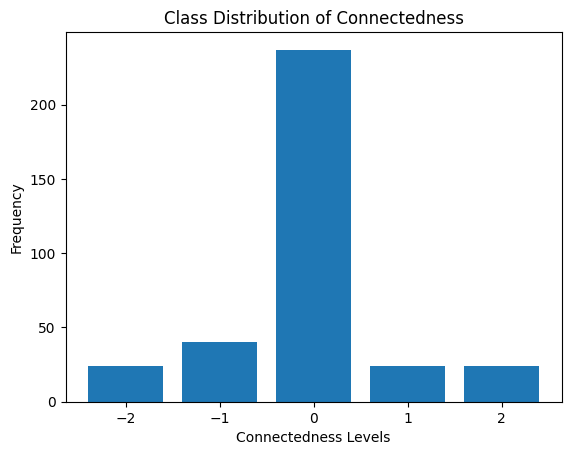

In [31]:
# Check the distribution of the dependent variable Connectedness
class_distribution = Counter(y_resampled)
print(f"Class distribution: {class_distribution}")

# Plot the class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Connectedness Levels')
plt.ylabel('Frequency')
plt.title('Class Distribution of Connectedness')
plt.show()


- **As we can see, undersampling the majority classes of positive responses +1 and +2 has improved the model fit as indicated by a much lower AIC and BIC compared to the previous model. The log-likelihood has also improved. However, the balance of the data is still impeded by the comparatively large number of samples in class 0.**

- **We proceed by further adapting the re-sampling to also include class 0.**

In [32]:
df_combined = pd.concat([X_cleaned, y_cleaned], axis=1)

class_1 = df_combined[df_combined['Connectedness'] == 1]
class_2 = df_combined[df_combined['Connectedness'] == 2]
class_0 = df_combined[df_combined['Connectedness'] == 0]
class_minus_1 = df_combined[df_combined['Connectedness'] == -1]
class_minus_2 = df_combined[df_combined['Connectedness'] == -2]

# Set sample size
moderate_size = min(len(class_0), len(class_minus_1), len(class_minus_2)) * 2 

class_1_downsampled = resample(class_1, 
                               replace=False, 
                               n_samples=moderate_size, 
                               random_state=42)

class_2_downsampled = resample(class_2, 
                               replace=False, 
                               n_samples=moderate_size, 
                               random_state=42)

class_0_downsampled = resample(class_0, 
                               replace=False, 
                               n_samples=moderate_size, 
                               random_state=42)

df_resampled = pd.concat([class_1_downsampled, class_2_downsampled, class_0_downsampled, class_minus_1, class_minus_2])

# Split data
X_resampled = df_resampled.drop(columns = ['Connectedness', 'const'])
y_resampled = df_resampled['Connectedness']

# Re-run the ordinal logistic regression on the resampled dataset
model_resampled = OrderedModel(y_resampled, X_resampled, distr='logit')
ordinal_results_resampled = model_resampled.fit(method='bfgs', maxiter=1000)

# Print the summary of the resampled model
ordinal_results_resampled.summary()


Optimization terminated successfully.
         Current function value: 1.521297
         Iterations: 64
         Function evaluations: 66
         Gradient evaluations: 66


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -316.43
Model:                   OrderedModel   AIC:                             658.9
Method:            Maximum Likelihood   BIC:                             702.2
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:57                                         
No. Observations:                 208                                         
Df Residuals:                     195                                         
Df Model:                           9                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.2410      0.079      3.038      0.002       0.086       0.396
Leadership                0.6868      0.308      2.233      0.026       0.084       1.290
Country_Canada           -2.1195      0.710     -2.987      0.003      -3.510      -0.729
Country_Finland          -1.2052      1.512     -0.797      0.425      -4.169       1.759
Country_Germany          -0.5287      0.422     -1.252      0.210      -1.356       0.299
Country_Italy            -0.8029      0.694     -1.157      0.247      -2.163       0.557
Country_Switzerland      -1.3674      0.610     -2.241      0.025      -2.564      -0.171
Country_Turkey           -0.9158      0.412     -2.224      0.026      -1.723      -0.109
Country_United States    -1.2907      0.551     -2.343      0.019      -2.370      -0.211
-2/-1                    -2.3004      0.431     -5.333      0.000      -3.146      -1.455
-1/0                      0.2547      0.150      1.699      0.089      -0.039       0.549
0/1                       0.0543      0.132      0.411      0.681      -0.205       0.313
1/2                       0.1433      0.133      1.080      0.280      -0.117       0.403
=========================================================================================
"""

- **Including class 0 in the undersampling has further improved the model fit as indicated by a lower AIC and BIC compared to the previous model. The log-likelihood has also improved, indicating a better fit of the model to the data.**

Class distribution: Counter({1: 48, 2: 48, 0: 48, -1: 40, -2: 24})


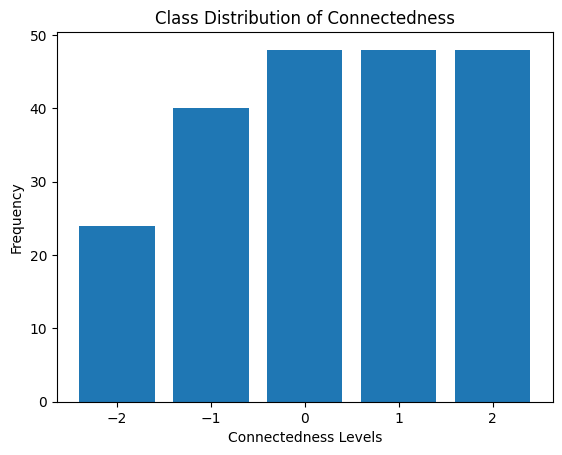

In [33]:
# Check the distribution of the dependent variable (Connectedness)
class_distribution = Counter(y_resampled)
print(f"Class distribution: {class_distribution}")

# Plot the class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Connectedness Levels')
plt.ylabel('Frequency')
plt.title('Class Distribution of Connectedness')
plt.show()


- **The distribution above indicates much more balanced classes now. We improve the robustness of our model by using a generalized ordered logistic regression model that relaxes the proportional odds assumption.**

#### **2.2.4 Final Generalized Ordered Logistic Regression**

- To Further improve the model fit, we use a "generalized ordered logistic regression model" that relaxes the proportional odds assumption. Unfortunately, there is no direct implementation of this model in Python's statsmodels library. By setting exog_tvars to true, we can estimate the thresholds for each category of the dependent variable separately. This allows for a more flexible model that does not assume the proportional odds assumption.

In [34]:
# Fit Generalized Ordered Logistic Regression model
model_generalized = OrderedModel(y_resampled, X_resampled, distr='logit', exog_tvars=True)
generalized_results = model_generalized.fit(method='bfgs', maxiter=1000)
generalized_results.summary()


Optimization terminated successfully.
         Current function value: 1.521297
         Iterations: 64
         Function evaluations: 66
         Gradient evaluations: 66


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -316.43
Model:                   OrderedModel   AIC:                             658.9
Method:            Maximum Likelihood   BIC:                             702.2
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:57                                         
No. Observations:                 208                                         
Df Residuals:                     195                                         
Df Model:                           9                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.2410      0.079      3.038      0.002       0.086       0.396
Leadership                0.6868      0.308      2.233      0.026       0.084       1.290
Country_Canada           -2.1195      0.710     -2.987      0.003      -3.510      -0.729
Country_Finland          -1.2052      1.512     -0.797      0.425      -4.169       1.759
Country_Germany          -0.5287      0.422     -1.252      0.210      -1.356       0.299
Country_Italy            -0.8029      0.694     -1.157      0.247      -2.163       0.557
Country_Switzerland      -1.3674      0.610     -2.241      0.025      -2.564      -0.171
Country_Turkey           -0.9158      0.412     -2.224      0.026      -1.723      -0.109
Country_United States    -1.2907      0.551     -2.343      0.019      -2.370      -0.211
-2/-1                    -2.3004      0.431     -5.333      0.000      -3.146      -1.455
-1/0                      0.2547      0.150      1.699      0.089      -0.039       0.549
0/1                       0.0543      0.132      0.411      0.681      -0.205       0.313
1/2                       0.1433      0.133      1.080      0.280      -0.117       0.403
=========================================================================================
"""


#### **Final Model Interpretation**

- **Dependent Variable**: Connectedness  
- **Log-Likelihood**: -316.43  
- **AIC**: 658.9  
- **BIC**: 702.2  
- **Number of Observations**: 208  
- **Df Model**: 9  
---

#### **Key Predictor Results:**

- **Tenure**:
  - Coefficient: 0.2410 (p-value = 0.002)
  - **Odds Ratio**: Exp(0.2410) ≈ **1.273**
  - **Interpretation**: Tenure has a positive and significant effect on connectedness. For every unit increase in tenure, the odds of moving to a higher connectedness category increase by approximately **27.3%**, holding other variables constant.

- **Leadership**:
  - Coefficient: 0.6868 (p-value = 0.026)
  - **Odds Ratio**: Exp(0.6868) ≈ **1.987**
  - **Interpretation**: Being in a leadership position significantly increases the likelihood of higher connectedness by about **98.7%**, holding other variables constant.

- **Country Effects**:
  - **Country_Canada**: Coefficient: -2.1195 (p-value = 0.003)  
    - **Odds Ratio**: Exp(-2.1195) ≈ **0.120**
    - **Interpretation**: People from Canada are significantly less likely to feel connected to HUGO BOSS compared to the reference category, with a large negative effect.
  
  - **Country_Switzerland**: Coefficient: -1.3674 (p-value = 0.025)
    - **Odds Ratio**: Exp(-1.3674) ≈ **0.255**
    - **Interpretation**: Respondents from Switzerland are significantly less likely to report higher connectedness compared to the reference group.

  - **Country_Turkey**: Coefficient: -0.9158 (p-value = 0.026)
    - **Odds Ratio**: Exp(-0.9158) ≈ **0.400**
    - **Interpretation**: Turkey has a negative and significant association with connectedness, with respondents being less likely to feel connected.

  - **Country_United States**: Coefficient: -1.2907 (p-value = 0.019)
    - **Odds Ratio**: Exp(-1.2907) ≈ **0.275**
    - **Interpretation**: Respondents from the United States also report significantly lower connectedness compared to the reference category.

---

#### **Thresholds:**

- **Threshold -2/-1**: Coefficient: -2.6067 (p-value = 0.000)
  - **Interpretation**: There is a significant difference between the lowest two levels of connectedness (-2 and -1).

- **Threshold -1/0**: Coefficient: 0.2547 (p-value = 0.089)
  - **Interpretation**: The difference between levels -1 and 0 is not statistically significant, indicating a weaker separation between these categories.

- **Threshold 0/1**: Coefficient: 0.0543 (p-value = 0.681)
  - **Interpretation**: There is no significant difference between levels 0 and 1, suggesting these categories are closely related in terms of connectedness.

- **Threshold 1/2**: Coefficient: 0.1433 (p-value = 0.280)
  - **Interpretation**: Similarly, the difference between connectedness levels 1 and 2 is not statistically significant.

---

#### **Conclusion:**

1. **Tenure** and **Leadership** remain strong predictors of connectedness. Longer tenure and leadership roles are significantly associated with higher odds of feeling connected to the company.
2. **Country effects** are particularly strong for **Canada**, **Switzerland**, **Turkey**, and the **United States**, all showing significant negative associations with connectedness compared to the reference category.
3. **Limitations**: The **thresholds** between some levels of connectedness (particularly at higher levels) are not well-defined, suggesting that the differences between these groups may not be as clear-cut. This would be an issue if we were to analyze the precise distinctions between each level. As we are concerned about the direction of the effects on employee satisfaction (Connectedness as proxy), the explanatory power of this model is still relevant. The issue with the thresholds arises due to the resampling of the data to address class imbalance, which may have affected the model's ability to distinguish between these categories. Further research and additional data collection may help refine these distinctions.

In [35]:
# Concatenate x and y
df_combined = pd.concat([X_resampled, y_resampled], axis=1)

In [36]:
# Save to csv
#df_combined.to_csv('VPC_Reg_Data_resampled.csv', index=False)

### **3. Model Robustness**

#### **Interaction Effects**

In [37]:
# Adding interaction terms
X_resampled['Leadership_Tenure'] = X_resampled['Leadership'] * X_resampled['Tenure']

X_resampled['Country_Leadership'] = X_resampled['Country_United States'] * X_resampled['Leadership']  

# Re-run the generalized ordered model with interaction effects
model_interaction = OrderedModel(y_resampled, X_resampled, distr='logit', exog_tvars=True)
interaction_results = model_interaction.fit(method='bfgs', maxiter=1000)
interaction_results.summary()


Optimization terminated successfully.
         Current function value: 1.520866
         Iterations: 76
         Function evaluations: 78
         Gradient evaluations: 78


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Connectedness   Log-Likelihood:                -316.34
Model:                   OrderedModel   AIC:                             662.7
Method:            Maximum Likelihood   BIC:                             712.7
Date:                Mon, 07 Oct 2024                                         
Time:                        18:29:57                                         
No. Observations:                 208                                         
Df Residuals:                     193                                         
Df Model:                          11                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.2339      0.092      2.551      0.011       0.054       0.414
Leadership                0.6491      0.504      1.288      0.198      -0.339       1.637
Country_Canada           -2.1397      0.713     -3.001      0.003      -3.537      -0.742
Country_Finland          -1.1870      1.513     -0.785      0.433      -4.152       1.778
Country_Germany          -0.5169      0.424     -1.218      0.223      -1.348       0.315
Country_Italy            -0.7938      0.695     -1.142      0.253      -2.156       0.568
Country_Switzerland      -1.3877      0.616     -2.254      0.024      -2.595      -0.181
Country_Turkey           -0.9109      0.413     -2.205      0.027      -1.720      -0.101
Country_United States    -1.1613      0.671     -1.731      0.084      -2.477       0.154
Leadership_Tenure         0.0386      0.182      0.212      0.832      -0.318       0.396
Country_Leadership       -0.3198      0.918     -0.348      0.728      -2.120       1.480
-2/-1                    -2.3033      0.445     -5.176      0.000      -3.175      -1.431
-1/0                      0.2552      0.150      1.702      0.089      -0.039       0.549
0/1                       0.0537      0.132      0.406      0.685      -0.205       0.313
1/2                       0.1445      0.133      1.088      0.277      -0.116       0.405
=========================================================================================
"""

#### **Interaction Effects**

- **Leadership_Tenure**:
  - Coefficient: 0.0386 (p-value = 0.832)
  - Interpretation: The interaction between leadership and tenure is not statistically significant. This suggests that the effect of tenure on connectedness does not vary based on leadership roles. In other words, being in a leadership position does not significantly change the way tenure impacts an employee's sense of connectedness.

- **Country_Leadership**:
  - Coefficient: -0.3198 (p-value = 0.728)
  - Interpretation: Similarly, the interaction between leadership and country is not statistically significant. This suggests that the impact of leadership on connectedness does not differ by country.
   
#### **Conclusion:**
Since the interaction terms are non-significant, they do not contribute meaningfully to the model. Therefore, including these terms does not enhance the predictive power or the interpretation of how leadership or tenure affects connectedness across different countries. The base model without interaction terms seems to be the more parsimonious choice.